In [6]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import IPython
from IPython import display
import sklearn
import random
import time
import warnings

In [7]:
#Common Model Algorithms
from sklearn import svm,tree,linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process
from xgboost import XGBClassifier
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualication defaults
#% matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [8]:
#import data
train_df = pd.read_csv('data/dataset_new_1.csv')
test_df = pd.read_csv('data/dataset_new_2.csv')

#train_df = train_df.loc[train_df['stop_id'] == 2000340]
#test_df = test_df.loc[test_df['stop_id'] == 2000340]
"""
predict train delay value
"""
train_df.describe()
train_df.head(20)

,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour
0,2000332,0,2019-03-29 09:15:01,0,2019-03-29 09:16:01,SCHEDULED,112F.1357.117.100.T.8.55955635,NSN_1c,2019-03-29 07:58:06,"Central Station, Platform 12",-33.883716,151.206534,T1,"North Shore, Northern & Western Line",9,9
1,2135233,48,2019-03-29 09:30:25,48,2019-03-29 09:30:55,SCHEDULED,112F.1357.117.100.T.8.55955635,NSN_1c,2019-03-29 09:28:57,"Strathfield Station, Platform 3",-33.871409,151.094068,T1,"North Shore, Northern & Western Line",9,9
2,2000324,0,2019-03-29 09:15:01,0,2019-03-29 09:16:01,SCHEDULED,112F.1357.117.100.T.8.55955635,NSN_1c,2019-03-29 07:42:43,"Central Station, Platform 4",-33.883325,151.205834,T1,"North Shore, Northern & Western Line",9,9
3,2121223,215,2019-03-29 08:23:05,185,2019-03-29 08:23:35,SCHEDULED,122D.1357.117.100.A.8.55956795,NSN_1c,2019-03-29 08:08:16,"Epping Station, Platform 3",-33.772611,151.081813,T1,"North Shore, Northern & Western Line",8,8
4,2121223,315,2019-03-29 08:24:45,285,2019-03-29 08:25:15,SCHEDULED,122D.1357.117.100.A.8.55956795,NSN_1c,2019-03-29 08:18:15,"Epping Station, Platform 3",-33.772611,151.081813,T1,"North Shore, Northern & Western Line",8,8
5,2121223,351,2019-03-29 08:25:21,321,2019-03-29 08:25:51,SCHEDULED,122D.1357.117.100.A.8.55956795,NSN_1c,2019-03-29 08:23:15,"Epping Station, Platform 3",-33.772611,151.081813,T1,"North Shore, Northern & Western Line",8,8
6,2121223,0,2019-03-29 08:24:09,0,2019-03-29 08:26:59,SCHEDULED,122D.1357.117.100.A.8.55956795,NSN_1c,2019-03-29 08:28:25,"Epping Station, Platform 3",-33.772611,151.081813,T1,"North Shore, Northern & Western Line",8,8
7,2000338,0,2019-03-29 07:45:01,-3,2019-03-29 07:45:58,SCHEDULED,122D.1357.117.100.A.8.55956795,NSN_1c,2019-03-29 08:08:16,"Central Station, Platform 18",-33.884162,151.206912,T1,"North Shore, Northern & Western Line",7,7
8,2000338,479,2019-03-29 08:38:00,518,2019-03-29 08:39:39,SCHEDULED,127F.1357.117.64.A.8.55955451,NSN_1c,2019-03-29 08:58:39,"Central Station, Platform 18",-33.884162,151.206912,T1,"North Shore, Northern & Western Line",8,8
9,2000338,0,2019-03-29 10:15:01,0,2019-03-29 10:16:01,SCHEDULED,116H.1357.117.108.T.8.55956229,NSN_1c,2019-03-29 09:28:57,"Central Station, Platform 18",-33.884162,151.206912,T1,"North Shore, Northern & Western Line",10,10


In [9]:
##
#1.Correctness of data：
#2.data integrity：
#3.Data creativity：
#4.Data transformation：Category data-->Label Encoding

#integrity(Missing value).
##the percentage of missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
#print(missing_data.head(20))

total2 = train_df.isnull().sum().sort_values(ascending=False)
percent2 = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total2,percent2],axis=1,keys=['Total','Percent'])
print(missing_data2.head(20))
print(test_df.shape)

                       Total  Percent
departure_time_hour        0      0.0
arrival_time_hour          0      0.0
line_name                  0      0.0
line_id                    0      0.0
stop_lon                   0      0.0
stop_lat                   0      0.0
stop_name                  0      0.0
timestamp                  0      0.0
route_id                   0      0.0
trip_id                    0      0.0
schedule_relationship      0      0.0
departure_time             0      0.0
departure_delay            0      0.0
arrival_time               0      0.0
arrival_delay              0      0.0
stop_id                    0      0.0
(6921, 16)


In [10]:
train_df.describe(include='all')
print('%' * 40)


limit_missing_values = 0.25
train_limit_missing_values = len(train_df) * limit_missing_values
print('Train columns with null values:\n',
      train_df.columns[train_df.isnull().sum().values>train_limit_missing_values])#以列为标准，column
print('%'*40)
test_limit_missing_values = len(test_df) * limit_missing_values
print("Test columns with null values: \n",
     test_df.columns[test_df.isnull().sum().values>test_limit_missing_values])
#drop data column with more Null value,

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Train columns with null values:
 Index([], dtype='object')
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Test columns with null values: 
 Index([], dtype='object')


In [11]:
train_df['arrival_delay'].describe()

count    26000.000000
mean       255.382885
std        385.829966
min        -47.000000
25%          0.000000
50%         94.000000
75%        340.000000
max       5693.000000
Name: arrival_delay, dtype: float64

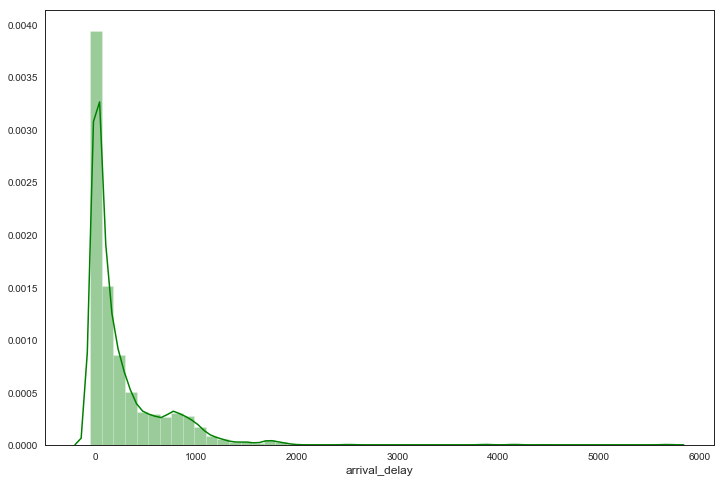

In [12]:
#Normal distribution
sns.distplot(train_df['arrival_delay'],color='green')

#### Normal distribution： most of data between -100 to 200.

In [13]:
print('Skewness: %f ' % train_df['arrival_delay'].skew())
print('Kurtosis: %f ' % train_df['arrival_delay'].kurt())

Skewness: 3.256724 
Kurtosis: 23.570685 


#### Target Data（the relationship between two variables）
the relationship between two numerical variables

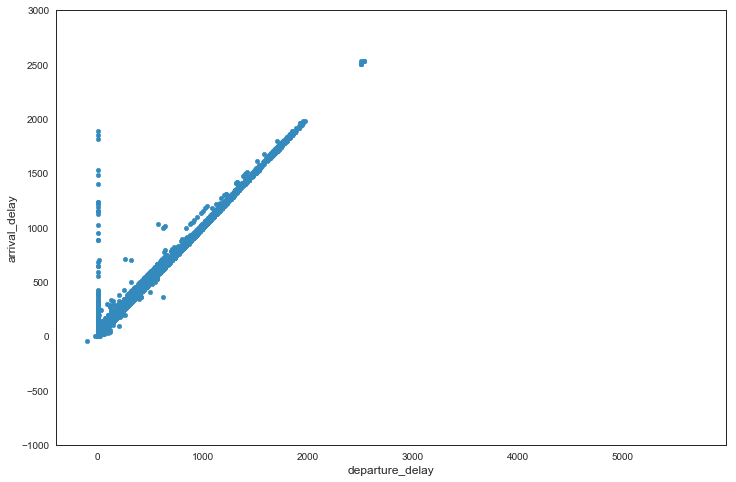

In [14]:
var = 'departure_delay'#departure delay
#concat-Series:default line merge，axis=1,column merge
data = pd.concat([train_df['arrival_delay'],train_df[var]],axis=1)
data.plot.scatter(x=var,y='arrival_delay',ylim=(-1000,3000)) #y axis limit

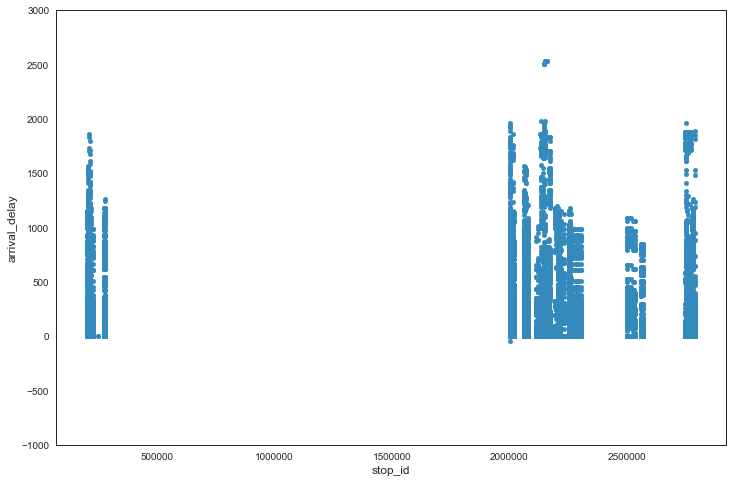

In [15]:
var = 'stop_id'#
data = pd.concat([train_df['arrival_delay'],train_df[var]],axis=1)
data.plot.scatter(x=var,y='arrival_delay',ylim=(-1000,3000))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

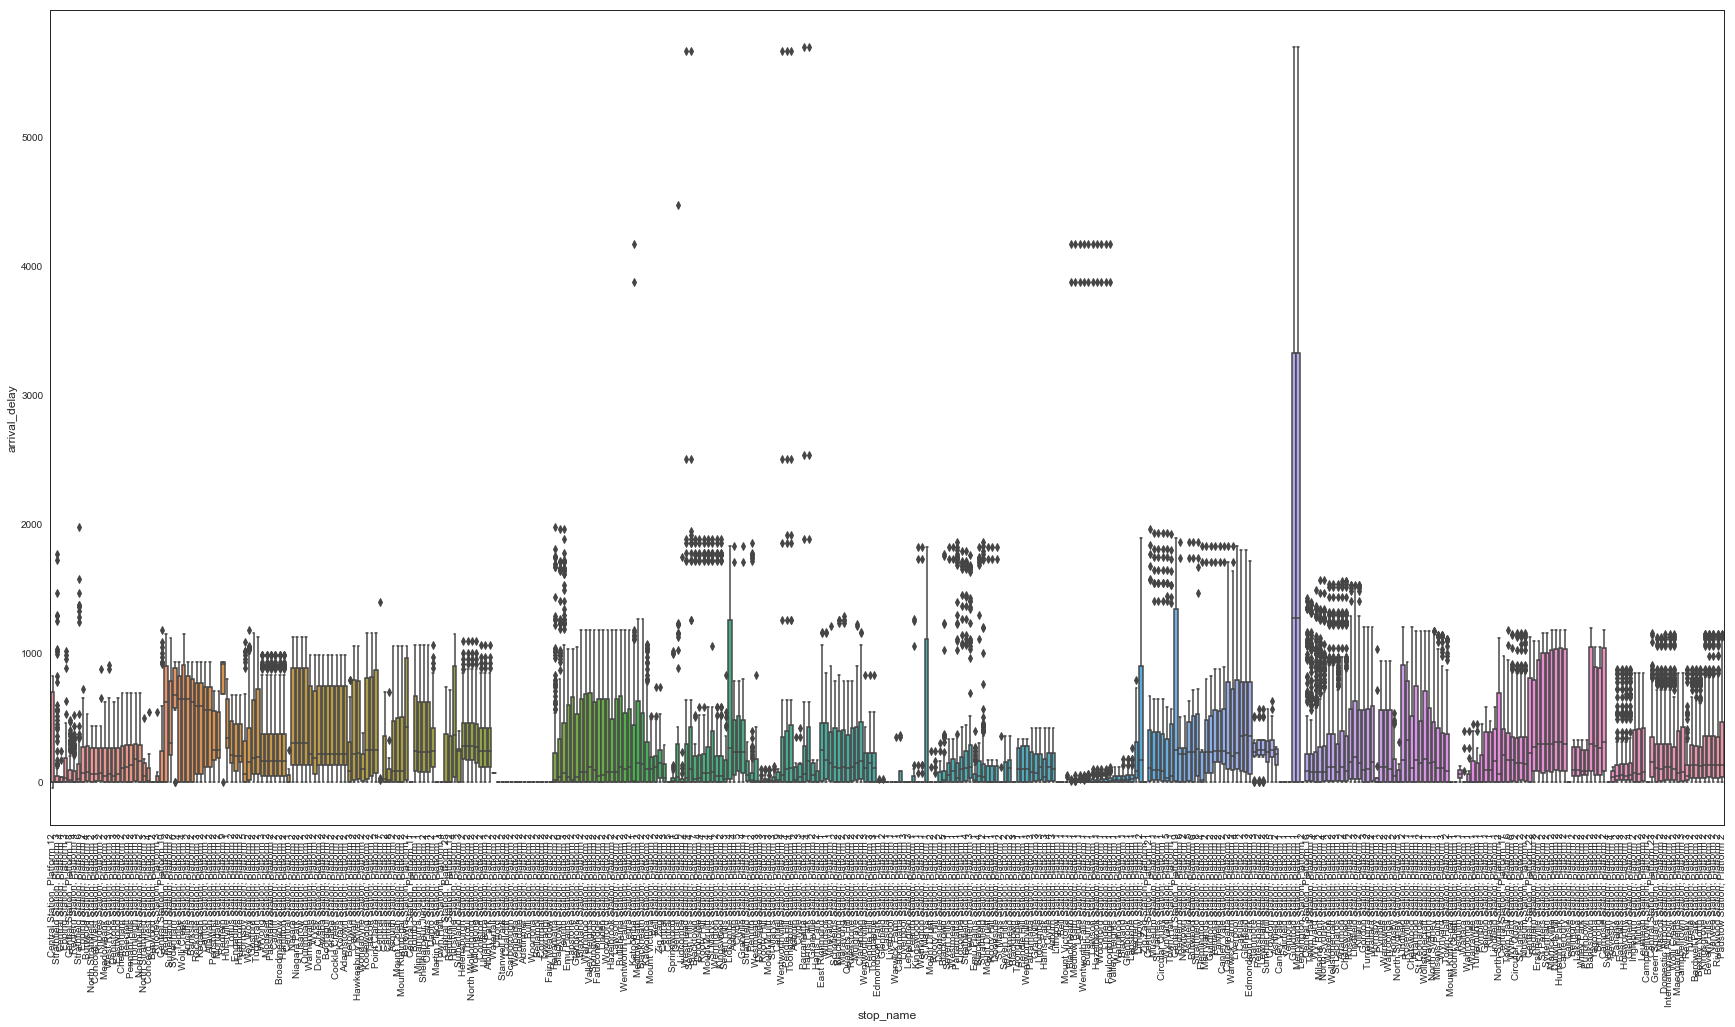

In [16]:
#relationship between variables of the same category(box diagram)
var = 'stop_name'#
data = pd.concat([train_df['arrival_delay'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(30,15))
#Abscissa category,Vertical ordinate target variable
fig = sns.boxplot(x=var,y='arrival_delay',data=data)
#fig.axis(ylim=-100,ymax=2500)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

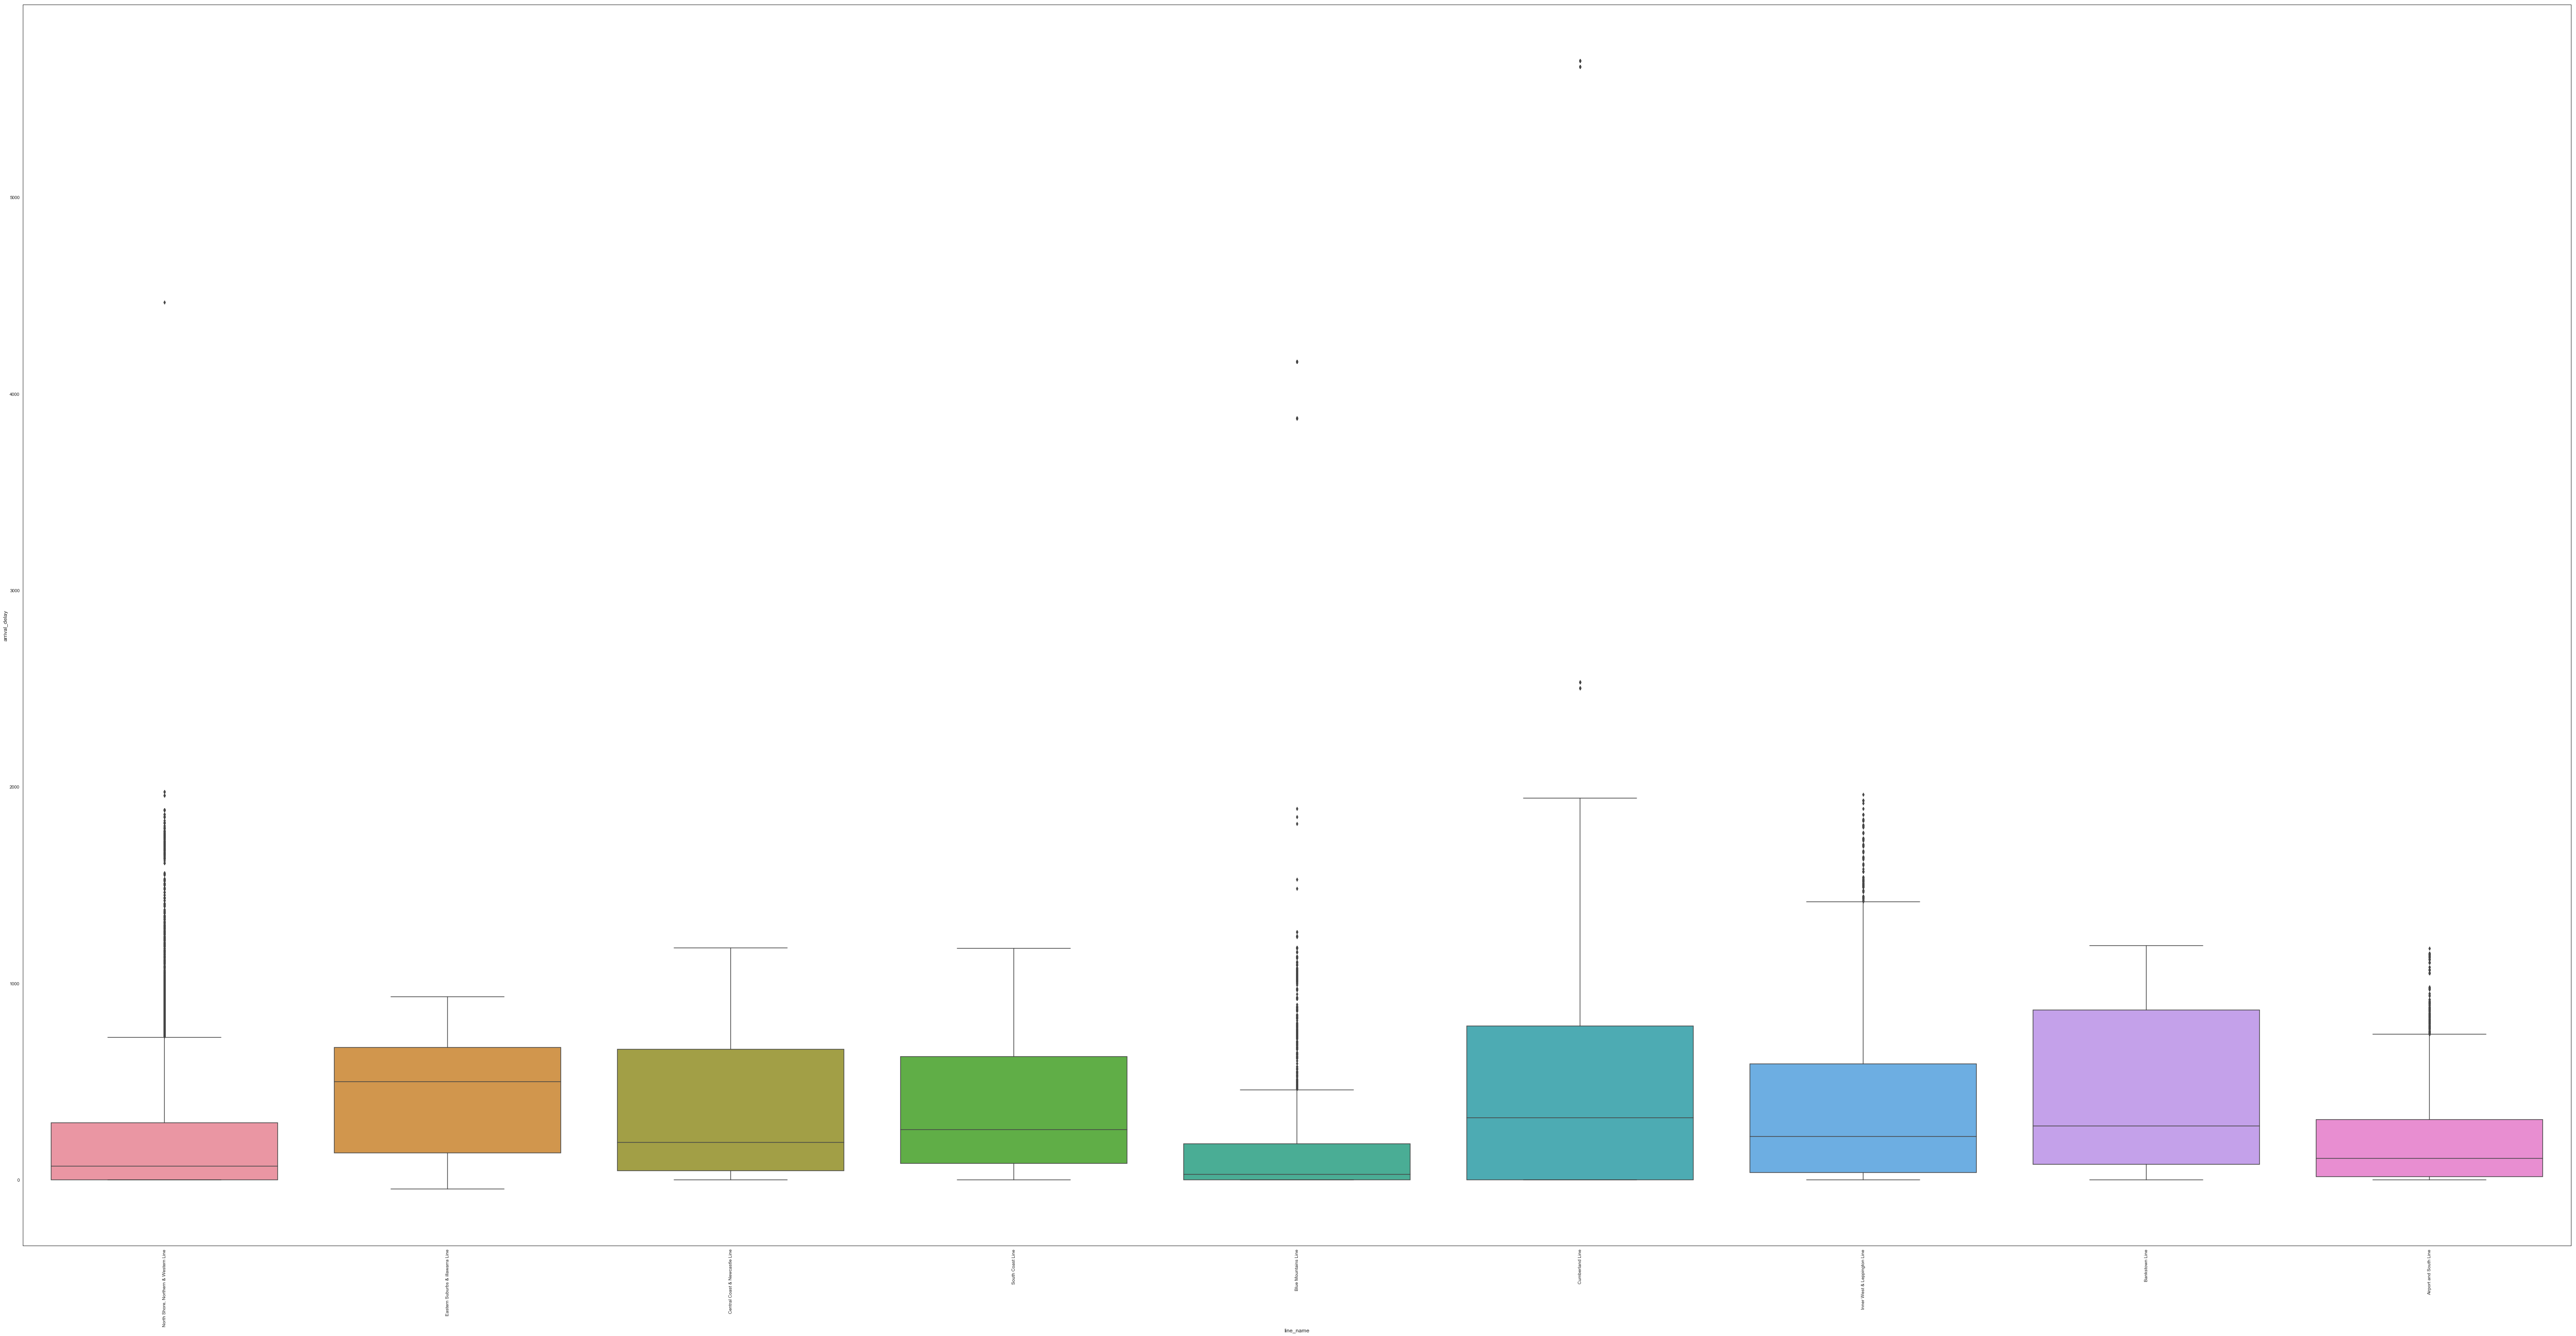

In [17]:
#relationship between variables of the same category(box diagram)
var = 'line_name'#Vehicle analysis
data = pd.concat([train_df['arrival_delay'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(100,50))
#Abscissa category,Vertical ordinate target variable
fig = sns.boxplot(x=var,y='arrival_delay',data=data)
#fig.axis(ylim=-100,ymax=2500)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

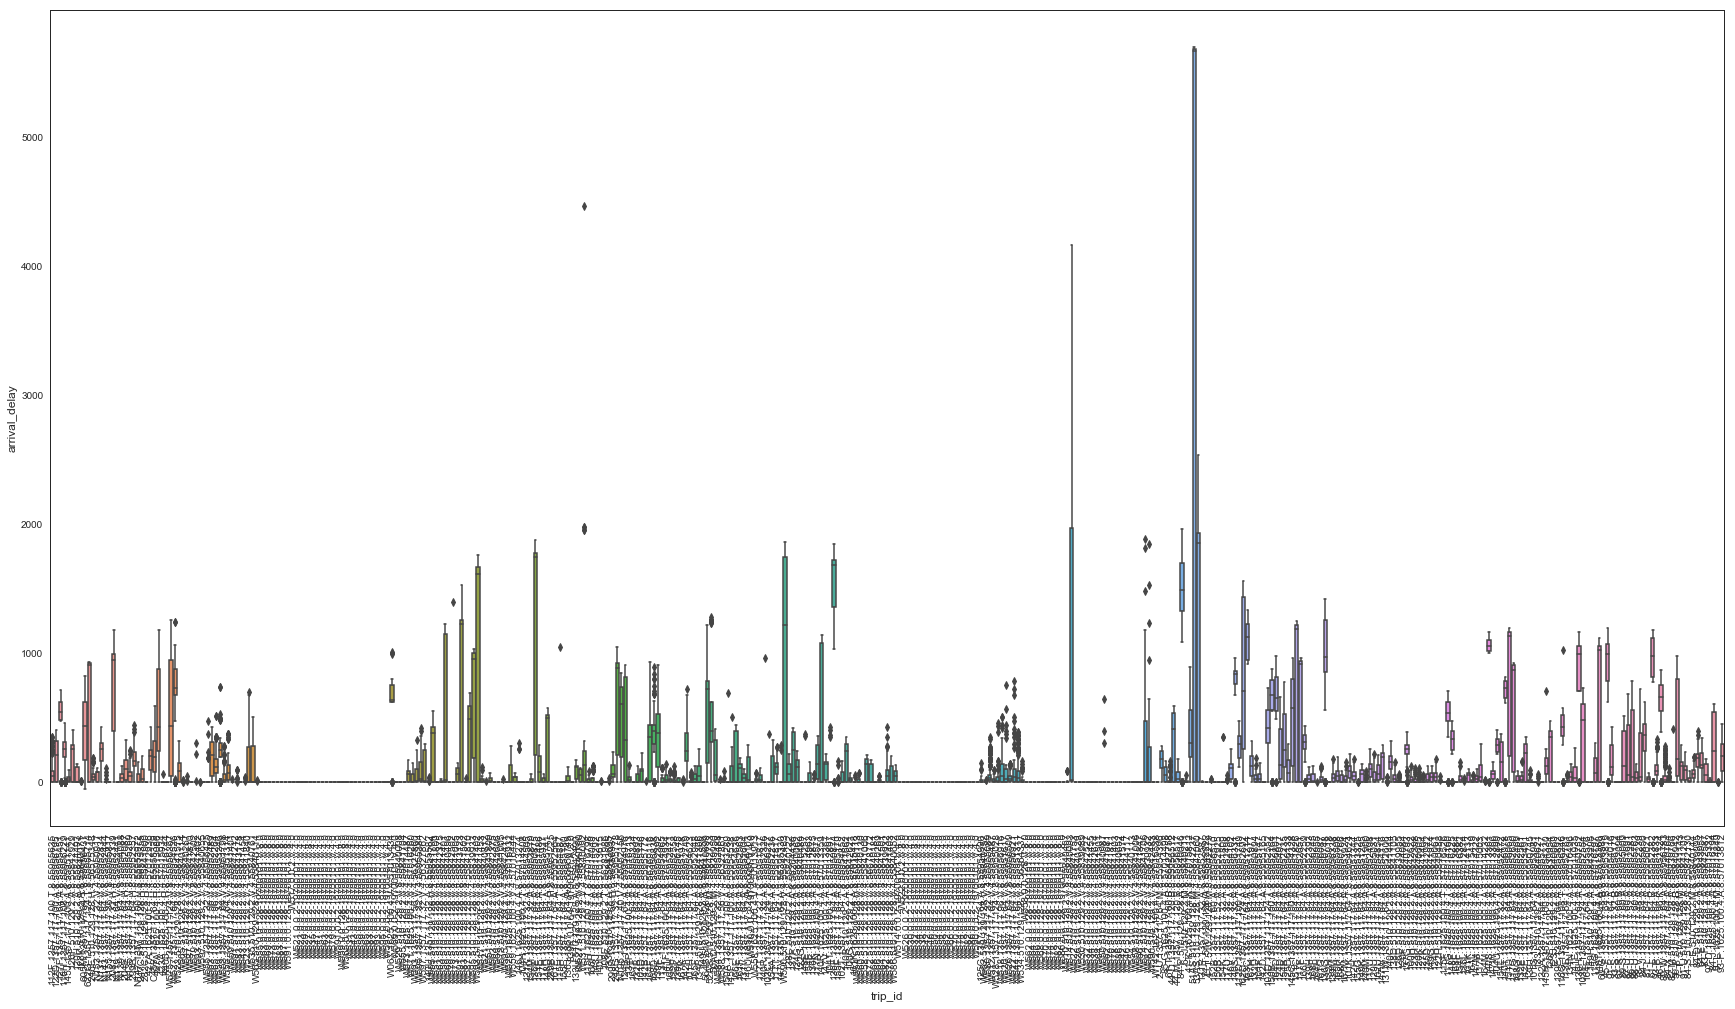

In [18]:
#relationship between variables of the same category(box diagram)
var = 'trip_id'#Vehicle analysis
data = pd.concat([train_df['arrival_delay'],train_df[var]],axis=1)
f,ax = plt.subplots(figsize=(30,15))
#Abscissa category,Vertical ordinate target variable
fig = sns.boxplot(x=var,y='arrival_delay',data=data)
#fig.axis(ylim=-100,ymax=2500)
plt.xticks(rotation=90)

#### Objective analysis 
change some value to feature
1. correlation matrix
3. Most relevant variable scatter plot

#### Overall correlation matrix


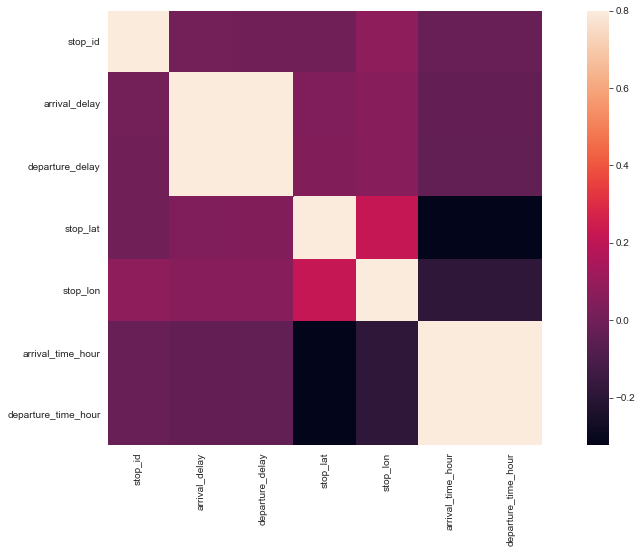

In [19]:
#overall correlation matrix
corrmat = train_df.corr()
f,ax = plt.subplots(figsize=(16,8))
sns.heatmap(corrmat,vmax=.8,square=True) #vmax color difference，lightest color在0.8

In [20]:
corrmat = train_df.corr().abs()

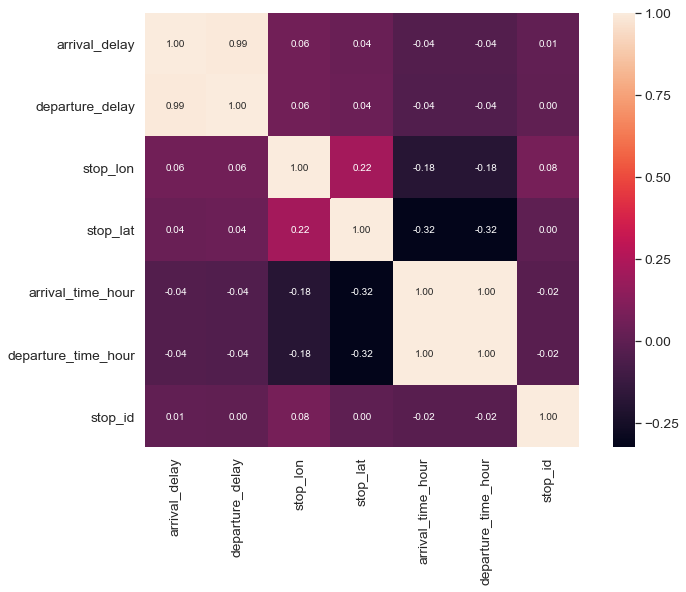

In [21]:
#arrival_delay correlation matrix
k = 7 #number of variables for heatmap

#nlargest - sort by arrival_delay column，return most 10 relevant row
cols = corrmat.nlargest(k,'arrival_delay')['arrival_delay'].index

#cm=corrmat.loc[cols,cols]
# catenary concentrates remove the sample of the target column,
#transposes, and calculates the correlation between the 10 features.
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},
                 yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [22]:
print(len(train_df.columns))
print(len(train_df.dtypes[train_df.dtypes == 'object'].index))

16
9


1. Confirm that the subjective feature selection variable ‘arrival_delay, 'departure_delay' is strongly related to the train arrival delay

/anaconda3/envs/pytorch/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


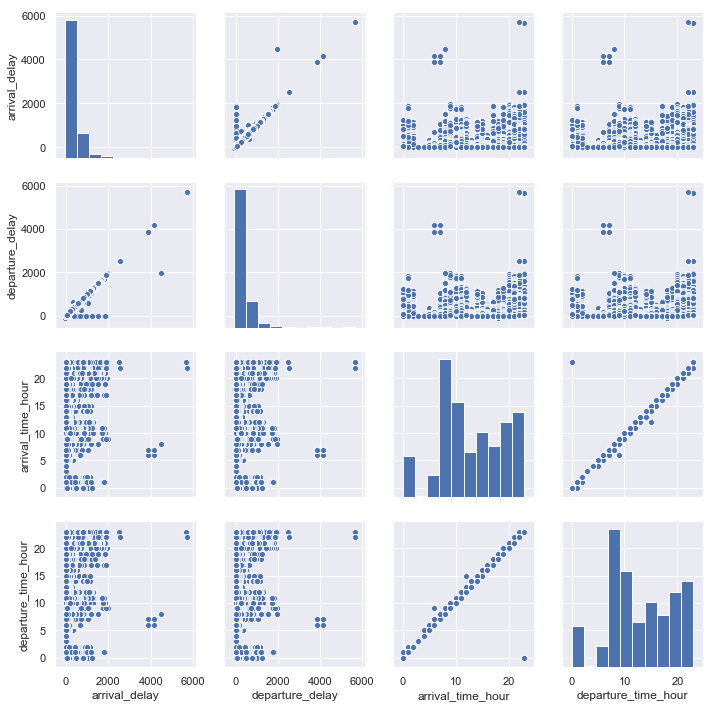

In [23]:
#Most relevant variable scatter plot
##scatterplot
sns.set()
cols = ['arrival_delay', 'departure_delay','arrival_time_hour','departure_time_hour',]
sns.pairplot(train_df[cols],size=2.5)
plt.show()

### Feature Analysis
##### Correctness
Remove outliers

Let's not consider the case of outliers first，because train have on time, delay, and adhead

#### creativity
Remove weakly related features, all category features

In [24]:
train_df.dtypes[(train_df.dtypes == 'object')].index# 'object' type

Index(['arrival_time', 'departure_time', 'schedule_relationship', 'trip_id',
       'route_id', 'timestamp', 'stop_name', 'line_id', 'line_name'],
      dtype='object')

#### Tilt data processing
##### Predicted value tilt, data processing
1. Skewness  
   The skewness of the normal distribution is 0. If the data is distributed symmetrically, the skewness = 0.
   
   If the skewness >0 distribution is right-biased, that is, the distribution has a long tail on the right
   
   If the skewness <0 distribution is left-biased, that is, the distribution has a long tail on the left, the   
   larger the absolute value of the skewness, the more serious the deviation of the distribution.
2. Kurtosis
   When kurtosis >0 it is steeper or thicker than the normal distribution
   
   The kurtosis coefficient <0 is more gradual than the normal distribution, or the tail is thinner

Normality--When we talk about normality what we mean is that the data should look like normal distrubution. this is important because several statistic tests rely on this (e.g t-statistics). In this project we will check univariate normality for "arrival delay'.Remember that univerate normality doesn't ensure multivariate normality, but it helps.another detail to take into account is that in big samples normality is not such an issue.

/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


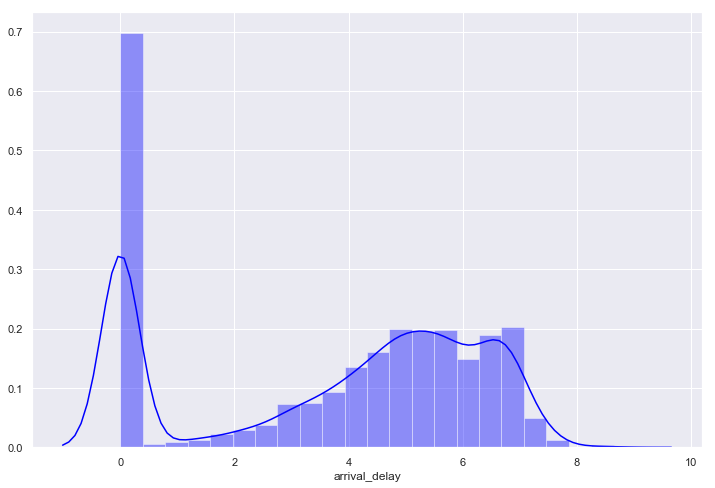

In [25]:
#normal distribution
#print(train_df['arrival_delay'])
#train_df = train_df.drop(train_df[(train_df['arrival_delay'] == None)].index)
train_df['arrival_delay'] = np.log1p(train_df['arrival_delay'])
sns.distplot(train_df['arrival_delay'].dropna(),color='blue')

In [26]:
print(train_df['arrival_delay'].skew())
train_df['arrival_delay'].kurt()

-0.4221097948857646


-1.331697751174662

#### Transformability
Label Encoding Some category features that can contain information
###### Express the order of the characteristics of the category Excellent > Good > Bad

In [27]:
train_df.head(5)

,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour
0,2000332,0.000000,2019-03-29 09:15:01,0,2019-03-29 09:16:01,SCHEDULED,112F.1357.117.100.T.8.55955635,NSN_1c,2019-03-29 07:58:06,"Central Station, Platform 12",-33.883716,151.206534,T1,"North Shore, Northern & Western Line",9,9
1,2135233,3.891820,2019-03-29 09:30:25,48,2019-03-29 09:30:55,SCHEDULED,112F.1357.117.100.T.8.55955635,NSN_1c,2019-03-29 09:28:57,"Strathfield Station, Platform 3",-33.871409,151.094068,T1,"North Shore, Northern & Western Line",9,9
2,2000324,0.000000,2019-03-29 09:15:01,0,2019-03-29 09:16:01,SCHEDULED,112F.1357.117.100.T.8.55955635,NSN_1c,2019-03-29 07:42:43,"Central Station, Platform 4",-33.883325,151.205834,T1,"North Shore, Northern & Western Line",9,9
3,2121223,5.375278,2019-03-29 08:23:05,185,2019-03-29 08:23:35,SCHEDULED,122D.1357.117.100.A.8.55956795,NSN_1c,2019-03-29 08:08:16,"Epping Station, Platform 3",-33.772611,151.081813,T1,"North Shore, Northern & Western Line",8,8
4,2121223,5.755742,2019-03-29 08:24:45,285,2019-03-29 08:25:15,SCHEDULED,122D.1357.117.100.A.8.55956795,NSN_1c,2019-03-29 08:18:15,"Epping Station, Platform 3",-33.772611,151.081813,T1,"North Shore, Northern & Western Line",8,8


In [28]:
from sklearn.preprocessing import LabelEncoder
#categories = [i for i in train_df.columns if i not in cols]
#process columns, apply LabelEncoder to categorical features

categories = ['arrival_time','departure_time','schedule_relationship','trip_id','route_id','timestamp','stop_name','line_id','line_name']

for c in categories:
    lbl = LabelEncoder() 
    train_df[c] = lbl.fit_transform(list(train_df[c].values))
    test_df[c] = lbl.fit_transform(list(test_df[c].values))


# shape        
print ('Shape all_data: {}'.format(train_df.shape))
print ('Shape all_data: {}'.format(test_df.shape))
test_df.head(50)

Shape all_data: (26000, 16)
Shape all_data: (6921, 16)


,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour
0,2211142,188,4166,188,3944,1,104,0,318,249,-33.951928,151.032393,9,0,10,10
1,2211142,34,4159,34,3939,1,95,0,318,249,-33.951928,151.032393,9,0,9,9
2,2211142,154,4163,154,3941,1,104,0,319,249,-33.951928,151.032393,9,0,10,10
3,2211142,0,4158,0,3938,1,95,0,319,249,-33.951928,151.032393,9,0,9,9
4,2211142,180,4165,180,3943,1,104,0,320,249,-33.951928,151.032393,9,0,10,10
5,2211142,169,4164,169,3942,1,104,0,321,249,-33.951928,151.032393,9,0,10,10
6,2211142,0,4161,0,3940,1,104,0,322,249,-33.951928,151.032393,9,0,9,9
7,2211142,5,4351,5,4118,1,101,0,326,249,-33.951928,151.032393,9,0,12,12
8,2211142,0,4349,0,4117,1,101,0,327,249,-33.951928,151.032393,9,0,12,12
9,2211142,22,4355,22,4121,1,101,0,328,249,-33.951928,151.032393,9,0,12,12


In [29]:
#train_df['arrival_delay'].dtypes
#train_df.dtypes[(train_df.dtypes == 'object')].index
train_df['stop_lon'].std()

0.3125157955776271

In [30]:
numeric_features = list(train_df.dtypes[train_df.dtypes != 'object'].index)
numeric_features.remove('arrival_delay')
numeric_features

['stop_id',
 'arrival_time',
 'departure_delay',
 'departure_time',
 'schedule_relationship',
 'trip_id',
 'route_id',
 'timestamp',
 'stop_name',
 'stop_lat',
 'stop_lon',
 'line_id',
 'line_name',
 'arrival_time_hour',
 'departure_time_hour']

In [31]:
train_df.head(5)

,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour
0,2000332,0.000000,5512,0,5300,1,20,13,146,63,-33.883716,151.206534,3,7,9,9
1,2135233,3.891820,5888,48,5648,1,20,13,164,301,-33.871409,151.094068,3,7,9,9
2,2000324,0.000000,5512,0,5300,1,20,13,143,74,-33.883325,151.205834,3,7,9,9
3,2121223,5.375278,4597,185,4440,1,41,13,148,116,-33.772611,151.081813,3,7,8,8
4,2121223,5.755742,4616,285,4460,1,41,13,150,116,-33.772611,151.081813,3,7,8,8


In [32]:
#Standardize all features after conversion
# box-cox transform
from scipy.special import boxcox1p
# skewed_features = list(skewness)
lam = 0.15
for feature in numeric_features:
    #all_data[feat] += 1
    train_df[feature] = boxcox1p(train_df[feature], lam)
    test_df[feature] = boxcox1p(test_df[feature], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [33]:
test_df.head(5)

,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour
0,52.982072,188,16.607935,7.967837,16.417585,0.730463,6.732788,0.0,9.163203,8.594922,NaN,7.497765,2.75025,0.0,2.885846,2.885846
1,52.982072,34,16.602067,4.697012,16.413194,0.730463,6.553880,0.0,9.163203,8.594922,NaN,7.497765,2.75025,0.0,2.750250,2.750250
2,52.982072,154,16.605421,7.538898,16.414951,0.730463,6.732788,0.0,9.170637,8.594922,NaN,7.497765,2.75025,0.0,2.885846,2.885846
3,52.982072,0,16.601227,0.000000,16.412315,0.730463,6.553880,0.0,9.170637,8.594922,NaN,7.497765,2.75025,0.0,2.750250,2.750250
4,52.982072,180,16.607098,7.873203,16.416707,0.730463,6.732788,0.0,9.178051,8.594922,NaN,7.497765,2.75025,0.0,2.885846,2.885846


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(train_df[numeric_features])
train_df[numeric_features] = scaler.transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])

# scaler = MinMaxScaler()
# scaler.fit(train_df[numeric_features])
# train_df[numeric_features] = scaler.transform(train_df[numeric_features])
# test_df[numeric_features] = scaler.transform(test_df[numeric_features])

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/utils/extmath.py:771: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/utils/extmath.py:776: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count


In [35]:
category_columns = train_df.dtypes[train_df.dtypes == 'object'].index

In [36]:
for i in category_columns:
    if len(train_df[i].value_counts().index) <= 2:
        print  ("Train\n" +  i)
        print (train_df[i].value_counts())
        
    if len(test_df[i].value_counts().index) <= 2:
        print ("Test\n" + i)
        print (test_df[i].value_counts())

In [37]:
#drop_columns = 'stop_lat'
#train_df = train_df.drop(drop_columns, axis=1)
#test_df = test_df.drop(drop_columns, axis=1)
#train_df=train_df.dropna(axis=0)
#test_df = test_df.dropna(axis=0)
#test_df.head(10)

In [38]:
train_df.isnull().any()
#train_df['departure_delay'].dropna(axis=0)
train_df.fillna(0,inplace=True)

In [39]:
#missing
test_df.fillna(0,inplace=True)
train_df.isnull().any()

stop_id                  False
arrival_delay            False
arrival_time             False
departure_delay          False
departure_time           False
schedule_relationship    False
trip_id                  False
route_id                 False
timestamp                False
stop_name                False
stop_lat                 False
stop_lon                 False
line_id                  False
line_name                False
arrival_time_hour        False
departure_time_hour      False
dtype: bool

In [40]:
test_df.head(10)

,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour
0,0.44566,188,-0.859597,0.528896,-0.876396,0.167068,-0.437141,-1.699189,0.373655,0.547118,0.0,0.107369,1.633262,-1.800567,-0.212126,-0.211656
1,0.44566,34,-0.861330,-0.207316,-0.877705,0.167068,-0.539183,-1.699189,0.373655,0.547118,0.0,0.107369,1.633262,-1.800567,-0.367975,-0.367226
2,0.44566,154,-0.860339,0.432349,-0.877181,0.167068,-0.437141,-1.699189,0.377206,0.547118,0.0,0.107369,1.633262,-1.800567,-0.212126,-0.211656
3,0.44566,0,-0.861578,-1.264542,-0.877967,0.167068,-0.539183,-1.699189,0.377206,0.547118,0.0,0.107369,1.633262,-1.800567,-0.367975,-0.367226
4,0.44566,180,-0.859844,0.507596,-0.876657,0.167068,-0.437141,-1.699189,0.380747,0.547118,0.0,0.107369,1.633262,-1.800567,-0.212126,-0.211656
5,0.44566,169,-0.860092,0.476961,-0.876919,0.167068,-0.437141,-1.699189,0.384279,0.547118,0.0,0.107369,1.633262,-1.800567,-0.212126,-0.211656
6,0.44566,0,-0.860835,-1.264542,-0.877443,0.167068,-0.437141,-1.699189,0.387802,0.547118,0.0,0.107369,1.633262,-1.800567,-0.367975,-0.367226
7,0.44566,5,-0.814652,-0.801848,-0.831684,0.167068,-0.470299,-1.699189,0.401801,0.547118,0.0,0.107369,1.633262,-1.800567,0.066469,0.066441
8,0.44566,0,-0.815130,-1.264542,-0.831937,0.167068,-0.470299,-1.699189,0.405278,0.547118,0.0,0.107369,1.633262,-1.800567,0.066469,0.066441
9,0.44566,22,-0.813699,-0.363433,-0.830928,0.167068,-0.470299,-1.699189,0.408746,0.547118,0.0,0.107369,1.633262,-1.800567,0.066469,0.066441


In [41]:
train_df.to_csv('data/train_delay_feature.csv',index=False)
test_df.to_csv('data/test_delay_feature.csv',index=False)


In [42]:
#Transformability
features_train = train_df.drop(['arrival_delay'], axis=1)
labels_train = train_df['arrival_delay']
features_test = test_df

In [43]:
#one hot encoding
features_train = pd.get_dummies(features_train)
features_test = pd.get_dummies(test_df)

missing_cols = set(features_train.columns) - set(features_test.columns)
for column in missing_cols:
    features_test[column] = 0
    
# It is especially important to ensure that the order of the test set columns is the same as that of the training set columns.
features_test = features_test[features_train.columns]
print(features_test.shape)

(6921, 15)


In [44]:
print (features_train.columns)

Index(['stop_id', 'arrival_time', 'departure_delay', 'departure_time',
       'schedule_relationship', 'trip_id', 'route_id', 'timestamp',
       'stop_name', 'stop_lat', 'stop_lon', 'line_id', 'line_name',
       'arrival_time_hour', 'departure_time_hour'],
      dtype='object')


In [45]:
#Segmentation training and test data
#from sklearn.model_selection import train_test_solit
##divide features_train and labels_train,train set = 20%，random
##Sequence: test features, training features, test objectives, training objectives

#output
X_train = features_train
y_train = labels_train
print(X_train.shape)

(26000, 15)


In [46]:
#Model implementation and integration
#Analyze problems and determine models
#The problem is regression, available models: linear return, decision tree, random forest, GBDT
#First experiment with a simple model, observe the score
#Regression model scoring indicators include: 1. SSE error squared sum, R-square coefficient
# # Import algorithm models and scoring criteria
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import fbeta_score, make_scorer, r2_score ,mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense,LSTM

# def rmsle_cv(model, train, value):
#     kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)
#     rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return rmse.mean()

# # for key_num in range(10,25,3):

# #     cols_model = cols[:key_num]
# #     drop_columns = [i for i in corrmat.columns if i not in cols_model]
# #     print drop_columns , "\n"
# #     X_train_model = X_train.drop(drop_columns, axis=1)

# #         # Initialize, determine random state, reproducible
# #     reg1 = DecisionTreeRegressor(random_state = 42)
# #     reg2 = LinearRegression()
# #     reg3 = RandomForestRegressor(random_state = 42)
# #     reg4 = XGBRegressor()
# #     reg5 = Lasso(alpha=0.001, random_state= 42)
# #     reg6 = SVR(kernel = 'rbf')
# #     reg7 = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

# #     # Create a dictionary to collect the effects of the learner
# #     # Learn, collect prediction scores
# #     results = {}
# #     for reg in [reg1, reg2, reg3, reg4, reg5, reg6, reg7]:
# #         # The name of the regression
# #         reg_name = reg.__class__.__name__
# # #         reg.fit(X_train_model, y_train)
# # #         pred_test = reg.predict(X_test_model)
# # #         results[reg_name] = rmse(y_test, pred_test)
# #         results[reg_name] = rmsle_cv(reg, X_train_model, y_train)
# #     print key_num, "---", results
# #     print '\n'

In [47]:
cols = cols[:26] 
drop_columns = [i for i in corrmat.columns if i not in cols]

print (drop_columns , "\n")
X_train = X_train.drop(drop_columns, axis=1)
print (len(X_train.columns))
print(X_train.shape)

['stop_id', 'stop_lat', 'stop_lon'] 

12
(26000, 12)


In [48]:
features_test = features_test.drop(drop_columns, axis=1)
#print(features_test.shape)
features_test.head(4)

,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,line_id,line_name,arrival_time_hour,departure_time_hour
0,-0.859597,0.528896,-0.876396,0.167068,-0.437141,-1.699189,0.373655,0.547118,1.633262,-1.800567,-0.212126,-0.211656
1,-0.861330,-0.207316,-0.877705,0.167068,-0.539183,-1.699189,0.373655,0.547118,1.633262,-1.800567,-0.367975,-0.367226
2,-0.860339,0.432349,-0.877181,0.167068,-0.437141,-1.699189,0.377206,0.547118,1.633262,-1.800567,-0.212126,-0.211656
3,-0.861578,-1.264542,-0.877967,0.167068,-0.539183,-1.699189,0.377206,0.547118,1.633262,-1.800567,-0.367975,-0.367226


In [49]:
#Grid search adjustment parameters
from sklearn.metrics import fbeta_score, make_scorer, r2_score ,mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [50]:
#X_train['departure_delay'].fillna(X_train['departure_delay'].mean,inplace=True)

In [52]:
X_train.isnull().any()

arrival_time             False
departure_delay          False
departure_time           False
schedule_relationship    False
trip_id                  False
route_id                 False
timestamp                False
stop_name                False
line_id                  False
line_name                False
arrival_time_hour        False
departure_time_hour      False
dtype: bool

In [53]:
#y_train['departure_delay'].fillna(X_train['departure_delay'].mean,inplace=True)
y_train.isnull().any()

False

In [54]:
#X_train=X_train.dropna(axis=0)
#y_train=y_train.dropna(axis=0)

In [55]:
#random forests 
# Model：RandomForest
# import Grid
from sklearn.model_selection import GridSearchCV

# Initialize the regression mode
reg = RandomForestRegressor(random_state=42)

# Determine the parameter list
parameters = {
    'max_leaf_nodes': range(20, 100 ,10),
    'max_features': ['auto', 'sqrt', 'log2'],

}

# Determine the scoring criteria
scorer = 'neg_mean_squared_error'

# Regression model using grid search
grid_reg = GridSearchCV(reg, parameters, scoring = scorer)

# training
grid_reg.fit(X_train, y_train)

grid_reg.cv_results_

# Get the best fit regression
best_reg_rf = grid_reg.best_estimator_

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWar

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/si

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
# print grid_reg.best_estimator_
print (grid_reg.cv_results_)
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(y_train.shape)
pred_rf = best_reg_rf.predict(X_train)
pred_test_rf = best_reg_rf.predict(features_test)
print(rmsle(y_train,pred_rf))
print(pred_test_rf)
print(best_reg_rf)
#print(y_train.shape)
#print(grid_reg.cv_results_['params'])

{'mean_fit_time': array([0.19110672, 0.19623502, 0.20931125, 0.21157654, 0.21367939,
       0.21907759, 0.22780466, 0.2360839 , 0.06065059, 0.06358703,
       0.07069246, 0.07412394, 0.07539058, 0.07750471, 0.08087905,
       0.08242989, 0.06328591, 0.06758324, 0.07001996, 0.06974069,
       0.07797972, 0.07394147, 0.07934149, 0.08409699]), 'std_fit_time': array([0.01832637, 0.01102772, 0.01239886, 0.01164589, 0.01015548,
       0.01175065, 0.01671356, 0.00933218, 0.0029454 , 0.00214324,
       0.00209373, 0.00148182, 0.00421359, 0.00335789, 0.00132122,
       0.00172422, 0.0001188 , 0.0014238 , 0.00234351, 0.00206774,
       0.00091433, 0.00232925, 0.00593834, 0.00234062]), 'mean_score_time': array([0.00250038, 0.00258803, 0.00269524, 0.00284028, 0.00289528,
       0.00322978, 0.00300407, 0.00328763, 0.00210778, 0.00223176,
       0.00265129, 0.00262658, 0.00259916, 0.00285141, 0.00280857,
       0.00303984, 0.00225854, 0.00237568, 0.00243171, 0.00246898,
       0.00277591, 0.00255354

/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


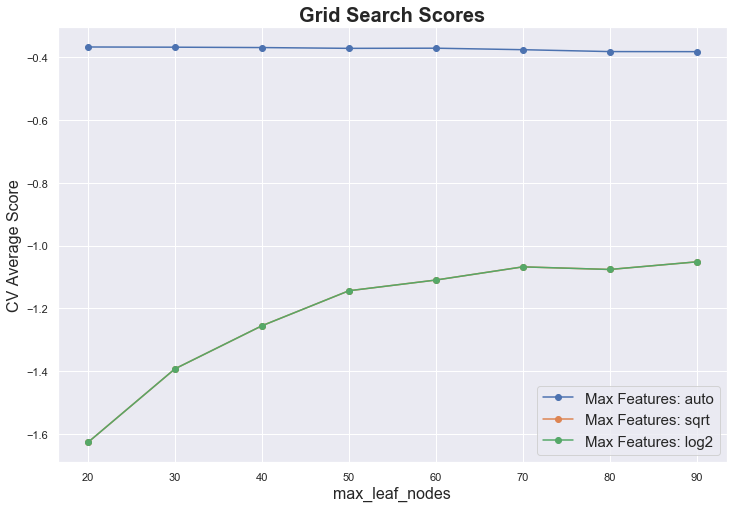

In [57]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(grid_reg.cv_results_, parameters['max_leaf_nodes'],parameters['max_features'] , 'max_leaf_nodes', 'Max Features')

#We can see that the d. 
#This is because the scikit-learn cross validation framework inverted them. 
#The reason is that internally, the framework requires that all metrics that are being 
#optimized are to be maximized, whereas log loss is a minimization metric. 
#It can easily be made maximizing by inverting the scores.

In [63]:
#Lasso regression
#In general, for high-level eigendata, especially linear relations are sparse, we will use lasso regression, or to find the main features in a bunch of features, then lasso regression is the first choice.
#Model: Linear regression
from sklearn.model_selection import GridSearchCV

#初始化回归模型
reg = Lasso(alpha = 0.001,random_state = 42)

#Determine the parameter list
parameters = {
    'normalize':[True,False],
    'alpha':[0,0.0001,0.0005,0.001]
}
#Determine the scoring criteria
scorer = 'neg_mean_squared_error'

#Regression model using grid search
grid_reg = GridSearchCV(reg,parameters,scoring=scorer)
#trainning
grid_reg.fit(X_train,y_train)

#Get the best fit regression
best_reg_lasso = grid_reg.best_estimator_

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small al

In [64]:
print(grid_reg.best_estimator_)
pred_lasso = best_reg_lasso.predict(X_train)
rmsle(pred_lasso,y_train)
grid_reg.cv_results_
#len(grid_reg.cv_results_['mean_test_score'])
print("LASSO model MSE score {:.4f}".format(mean_squared_error(y_train,pred_lasso)))
print("LASSO model RMSE score {:.4f}".format(rmsle(y_train,pred_lasso)))

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
LASSO model MSE score 0.4451
LASSO model RMSE score 0.6672


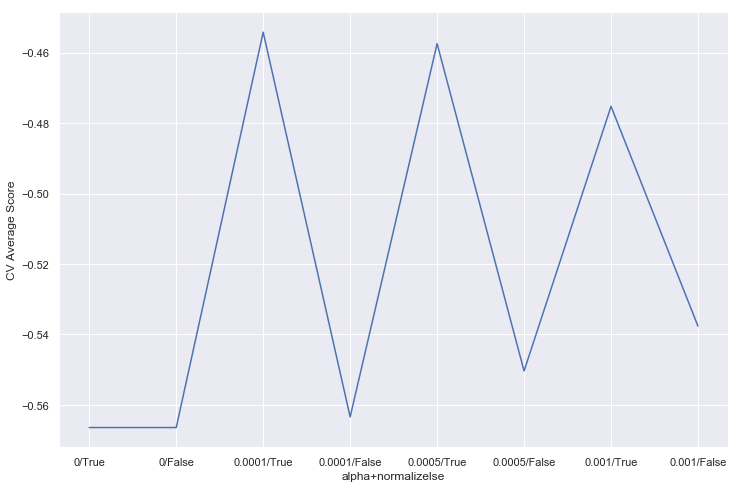

In [68]:
#plot_grid_search(grid_reg.cv_results_,['0/True','0/False','0.0001/True','0.0001/False', '0.0005/True', '0.0005/False','0.001/True','0.001/False'],parameters['alpha'] , 'alpha+normalize', 'Max Features')
plt.xlabel('alpha+normalizelse')
plt.ylabel('CV Average Score')
plt.plot(['0/True','0/False','0.0001/True','0.0001/False', '0.0005/True', '0.0005/False','0.001/True','0.001/False'],grid_reg.cv_results_['mean_test_score'])


In [56]:
#ElasticNet
#Elastic network, combined with L1 and L2 regularization
reg = ElasticNet(alpha=0.0005,l1_ratio = .9,random_state = 42)
parameters = {
    'alpha':[0,0.0001,0.0005,0.001],
    'l1_ratio':np.arange(0,1,0.1)
}
scorer = 'neg_mean_squared_error'

grid_reg = GridSearchCV(reg,parameters,scoring=scorer)
grid_reg.fit(X_train,y_train)
best_elasticNet_reg = grid_reg.best_estimator_

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small al

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/e

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small 

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

In [57]:
print(grid_reg.best_estimator_)
pred_elasticNet_reg = best_elasticNet_reg.predict(X_train)
rmsle(y_train,pred_elasticNet_reg)
print("ElasticNet model MSE score {:.4f}".format(mean_squared_error(y_train,pred_elasticNet_reg)))
print("ElasticNet model RMSE score {:.4f}".format(rmsle(y_train,pred_elasticNet_reg)))

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False)
ElasticNet model MSE score 0.4437
ElasticNet model RMSE score 0.6661


/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


array([-0.56644208, -0.56644208, -0.56644208, -0.56644208, -0.56644208,
       -0.56644208, -0.56644208, -0.56644208, -0.56644208, -0.56644208,
       -0.56576066, -0.56552543, -0.56529082, -0.56505182, -0.5648168 ,
       -0.56458241, -0.56434864, -0.56411539, -0.56388214, -0.56364755,
       -0.56293659, -0.56175867, -0.56064545, -0.5593787 , -0.55810802,
       -0.55682849, -0.55553617, -0.55424955, -0.55296402, -0.55166794,
       -0.55938462, -0.55698803, -0.55458298, -0.55215077, -0.54971253,
       -0.54719752, -0.54525279, -0.5433515 , -0.54143227, -0.53952983])

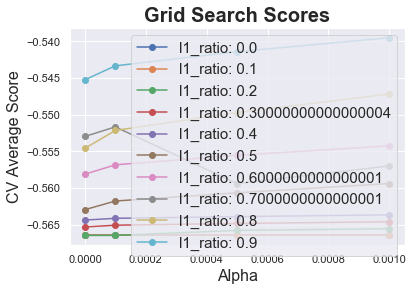

In [58]:
plot_grid_search(grid_reg.cv_results_,parameters['alpha'],parameters['l1_ratio'] , 'Alpha', 'l1_ratio')
grid_reg.cv_results_['mean_test_score']

In [59]:
#XGBoost
#Determine the number of estimators for learning rate and tree_based parameter tuning

##Determine the number of optimal decision trees, the cv function in xgboost to determine the optimal number of decisions, and improve the speed of XGBoost tuning
##There are 'early_stopping_rounds' 'rmse' stops without falling

# import xgboost as xgb
# from xgboost.sklearn import XGBRegressor

# def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
#     if useTrainCV:
#         xgb_param = alg.get_xgb_params()
#         xgtrain = xgb.DMatrix(X_train.values, label= y_train.values)
#         cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
#             metrics='rmse', early_stopping_rounds = early_stopping_rounds)
#         alg.set_params(n_estimators=cvresult.shape[0])
#         print cvresult

#     #Fit the algorithm on the data
#     alg.fit(X_train, y_train,eval_metric='rmse')

#     #Predict training set:
#     dtrain_predictions = alg.predict(X_train)

#     # result
#     print ("\nModel Report")
#     print ("RMSE Score (Train): %f" % rmse(y_train, dtrain_predictions))
    
#     # feature importance
#     feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)[:10,]
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [60]:
#Model：XGBoost
from sklearn.model_selection import GridSearchCV

best_reg_xgb = XGBRegressor(learning_rate = 0.01,n_estimators = 5000,max_depth = 4,min_child_weight = 1.5,
                            gamma = 0.1,subsample = 0.7, colsample_bytree = 0.6, seed = 27)
#model.fit(reg,X_train,y_train)

In [61]:
#best_reg_xgb.fit(X_train,y_train)
#pred_y_XGB = best_reg_xgb.predict(X_train)
#rmsle(pred_y_XGB,y_train)

In [62]:
#rmsle_cv(best_reg_xgb,X_train,y_train)

In [63]:
#2.adjust XGBoost relate parameter
##max_depth and min_weight parameter 
#max_depth tree maxim depth
#min_child_weight Minimum leaf node sample weight sum

param_test1 = {
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,6,2)
 }

#scorer = make_scorer(rmse)

# # Negative mean square error
grid_reg1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.01, n_estimators=5000, 
                                                max_depth=5, min_child_weight = 1,gamma = 0.1,
                                                subsample = 0.8, colsample_bytree = 0.6, seed = 27), 
                         param_grid = param_test1, scoring = 'neg_mean_squared_error')
grid_reg1.fit(X_train, y_train)
grid_reg1.cv_results_
grid_reg1.best_params_
grid_reg_xgb = grid_reg1.best_estimator_

### best max_depth = 3， min_child_weight = 1，

/anaconda3/envs/pytorch/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


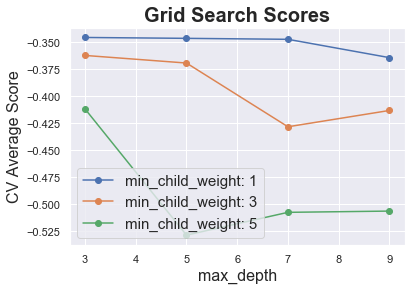

In [64]:
plot_grid_search(grid_reg1.cv_results_,param_test1['max_depth'],param_test1['min_child_weight'] , 'max_depth', 'min_child_weight')

In [65]:
grid_red1_pred=grid_reg_xgb.predict(X_train)
rmsle(y_train,grid_red1_pred)
print("XGBoost model MSE score {:.4f}".format(mean_squared_error(y_train,grid_red1_pred)))
print("XGBoost model RMSE score {:.4f}".format(rmsle(y_train,grid_red1_pred)))

XGBoost model MSE score 0.1654
XGBoost model RMSE score 0.4067


In [91]:
grid_red1_test_pred = grid_reg_xgb.predict(features_test)

In [93]:
grid_red1_test_pred

array([ 4.939443  ,  3.4224372 ,  4.7885337 , ..., -0.16840124,
       -0.15836096, -0.1465931 ], dtype=float32)

In [100]:
features_test_new = features_test

In [101]:
features_test_new['xgb_pred'] = grid_red1_test_pred

In [102]:
features_test_new.head(5)

,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,line_id,line_name,arrival_time_hour,departure_time_hour,xgb_pred
0,-0.859597,0.528896,-0.876396,0.167068,-0.437141,-1.699189,0.373655,0.547118,1.633262,-1.800567,-0.212126,-0.211656,4.939443
1,-0.861330,-0.207316,-0.877705,0.167068,-0.539183,-1.699189,0.373655,0.547118,1.633262,-1.800567,-0.367975,-0.367226,3.422437
2,-0.860339,0.432349,-0.877181,0.167068,-0.437141,-1.699189,0.377206,0.547118,1.633262,-1.800567,-0.212126,-0.211656,4.788534
3,-0.861578,-1.264542,-0.877967,0.167068,-0.539183,-1.699189,0.377206,0.547118,1.633262,-1.800567,-0.367975,-0.367226,0.103353
4,-0.859844,0.507596,-0.876657,0.167068,-0.437141,-1.699189,0.380747,0.547118,1.633262,-1.800567,-0.212126,-0.211656,4.922435


### Learning rate
Using Sklearn Learning curve function：http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [66]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


predict train delay value



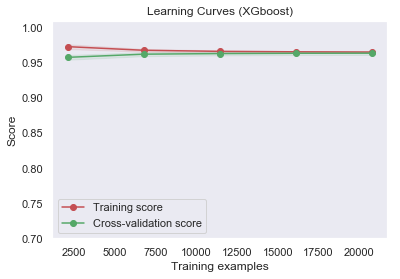

In [67]:
title = "Learning Curves (XGboost)"
##Cross validation with 100 iterations to get smoother mean test and train
##score curves,each time with 20% data randomly selected as a validation set
cv = ShuffleSplit(n_splits = 100,test_size = 0.2, random_state = 0)

estimator = XGBRegressor()
plot_learning_curve(estimator,title,features_train,labels_train,ylim=(0.7,1.01),cv = cv,n_jobs = 4)
plt.show()

In [68]:
# param_test1 = {
#     'max_depth': [4, 5, 6],
#     'min_child_weight': np.arange(1.0, 4.0, 0.5)
# }

# scorer = make_scorer(rmse)

# # Negative mean square error
# grid_reg1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=115, 
#                                                 max_depth=5, min_child_weight = 1,gamma = 0,
#                                                 subsample = 0.8, colsample_bytree = 0.8, seed = 27), 
#                          param_grid = param_test1, scoring = 'neg_mean_squared_error')
# grid_reg1.fit(X_train, y_train)
# grid_reg1.grid_scores_, grid_reg1.best_params_, grid_reg1.best_score_


In [69]:
#Gamma parameter adjustment 
##Minimum loss function drop value required for node splitting
# param_test3 = {
#     'gamma' : [i/10.0 for i in range(0,5)]
# }


# grid_reg1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=115, 
#                                                 max_depth=4, min_child_weight = 1.5,gamma = 0,
#                                                 subsample = 0.8, colsample_bytree = 0.8, seed = 27), 
#                          param_grid = param_test3, scoring = 'neg_mean_squared_error')
# grid_reg1.fit(X_train, y_train)
# grid_reg1.grid_scores_, grid_reg1.best_params_, grid_reg1.best_score_

###when learning rate is 0.1，ideal decision tree 115， 'max_depth'ideal value 4, 'min_child_weight' value 1.5， gammais 0

In [70]:
# adjust subsample and colsample_bytree parameter
##Proportion of sample and column sampling

# param_test4 = {
#     'subsample':np.arange(0.5, 1.0 ,0.05),
#     'colsample_bytree':np.arange(0.5, 1.0, 0.05)
# }


# grid_reg1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=115, 
#                                                 max_depth=4, min_child_weight = 1.5,gamma = 0,
#                                                 subsample = 0.8, colsample_bytree = 0.8, seed = 27), 
#                          param_grid = param_test4, scoring = 'neg_mean_squared_error')
# grid_reg1.fit(X_train, y_train)
# grid_reg1.grid_scores_, grid_reg1.best_params_, grid_reg1.best_score_

###when learning rate is 0.1，ideal decision tree115， 'max_depth' ideal value 4, 'min_child_weight' wis 1.5， gamma is 0,

###colsample_bytree is 0.6， subsample is 0.7，MSE is 0.0156

In [71]:
#Regularization parameter tuning

# param_test5 = {
#     "reg_alpha":np.arange(0.0, 1.1, 0.1),
#     "reg_lambda":np.arange(0.0, 1.1, 0.1)
# }

# grid_reg1 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.1, n_estimators=115, 
#                                                 max_depth=4, min_child_weight = 1.5,gamma = 0,
#                                                 subsample = 0.7, colsample_bytree = 0.6, seed = 27), 
#                          param_grid = param_test5, scoring = 'neg_mean_squared_error')
# grid_reg1.fit(X_train, y_train)
# grid_reg1.grid_scores_, grid_reg1.best_params_, grid_reg1.best_score_


In [72]:
#Reduce learning rate and determine ideal parameters
##Use a lower learning rate, more decision trees

# reg2 = XGBRegressor(learning_rate=0.1, n_estimators= 1000, 
#                          max_depth=4, min_child_weight = 1.5,gamma = 0,
#                         subsample = 0.7, colsample_bytree = 0.6, seed = 27)

# model.fit(reg2, X_train, y_train )

# pred_y_test = reg2.predict(X_test)
# rmse(pred_y_test, y_test)

In [73]:
X_train_new = X_train

In [74]:
X_train_new['xgb_pred'] = grid_red1_pred

In [75]:
X_train_new.head(5)

,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,line_id,line_name,arrival_time_hour,departure_time_hour,xgb_pred
0,-0.564782,-1.264542,-0.564468,0.167068,-2.076348,0.796791,-0.455960,-1.060827,0.213757,0.892841,-0.367975,-0.367226,0.340495
1,-0.493471,-0.074909,-0.495511,0.167068,-2.076348,0.796791,-0.338300,0.797204,0.213757,0.892841,-0.367975,-0.367226,4.154739
2,-0.564782,-1.264542,-0.564468,0.167068,-2.076348,0.796791,-0.476748,-0.890114,0.213757,0.892841,-0.367975,-0.367226,1.049625
3,-0.757340,0.521000,-0.753016,0.167068,-1.418568,0.796791,-0.442300,-0.389247,0.213757,0.892841,-0.537685,-0.536631,5.210704
4,-0.753022,0.740068,-0.748292,0.167068,-1.418568,0.796791,-0.428795,-0.389247,0.213757,0.892841,-0.537685,-0.536631,5.636954


In [76]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=2000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train_new, y_train)
lgb_train_pred = model_lgb.predict(X_train_new)
#rmsle(lgb_train_pred,y_train)
print("LightGBM model MSE score {:.4f}".format(mean_squared_error(y_train,lgb_train_pred)))
print("LightGBM model RMSE score {:.4f}".format(rmsle(y_train,lgb_train_pred)))

/anaconda3/envs/pytorch/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


LightGBM model MSE score 0.1238
LightGBM model RMSE score 0.3519


In [83]:
X_train_new['xgb_pred'] = lgb_train_pred

In [84]:
X_train_new.head(5)

,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,line_id,line_name,arrival_time_hour,departure_time_hour,xgb_pred
0,-0.564782,-1.264542,-0.564468,0.167068,-2.076348,0.796791,-0.455960,-1.060827,0.213757,0.892841,-0.367975,-0.367226,0.162616
1,-0.493471,-0.074909,-0.495511,0.167068,-2.076348,0.796791,-0.338300,0.797204,0.213757,0.892841,-0.367975,-0.367226,4.167467
2,-0.564782,-1.264542,-0.564468,0.167068,-2.076348,0.796791,-0.476748,-0.890114,0.213757,0.892841,-0.367975,-0.367226,1.935774
3,-0.757340,0.521000,-0.753016,0.167068,-1.418568,0.796791,-0.442300,-0.389247,0.213757,0.892841,-0.537685,-0.536631,5.291036
4,-0.753022,0.740068,-0.748292,0.167068,-1.418568,0.796791,-0.428795,-0.389247,0.213757,0.892841,-0.537685,-0.536631,5.712965


In [103]:
lgb_test_pred = model_lgb.predict(features_test_new)

In [106]:
features_test_new['xgb_pred'] = lgb_test_pred

In [107]:
features_test_new.head(5)

,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,line_id,line_name,arrival_time_hour,departure_time_hour,xgb_pred
0,-0.859597,0.528896,-0.876396,0.167068,-0.437141,-1.699189,0.373655,0.547118,1.633262,-1.800567,-0.212126,-0.211656,4.874431
1,-0.861330,-0.207316,-0.877705,0.167068,-0.539183,-1.699189,0.373655,0.547118,1.633262,-1.800567,-0.367975,-0.367226,3.502770
2,-0.860339,0.432349,-0.877181,0.167068,-0.437141,-1.699189,0.377206,0.547118,1.633262,-1.800567,-0.212126,-0.211656,4.810005
3,-0.861578,-1.264542,-0.877967,0.167068,-0.539183,-1.699189,0.377206,0.547118,1.633262,-1.800567,-0.367975,-0.367226,-0.176892
4,-0.859844,0.507596,-0.876657,0.167068,-0.437141,-1.699189,0.380747,0.547118,1.633262,-1.800567,-0.212126,-0.211656,4.840802


MSE 1、Only by adjusting the parameters and small optimization of the model, it is impossible to make the performance of the model greatly improved.

2、：To improve the performance of the model, you need to rely on other ways:

1、feature egineering

2、model stacking

### model stacking

### Less simple Stacking : Adding a Meta-model

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

   1. Split the total training set into two disjoint sets (here train and .holdout )

   2. Train several base models on the first part (train)

   3. Test these base models on the second part (holdout)

   4. Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target 
      variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.
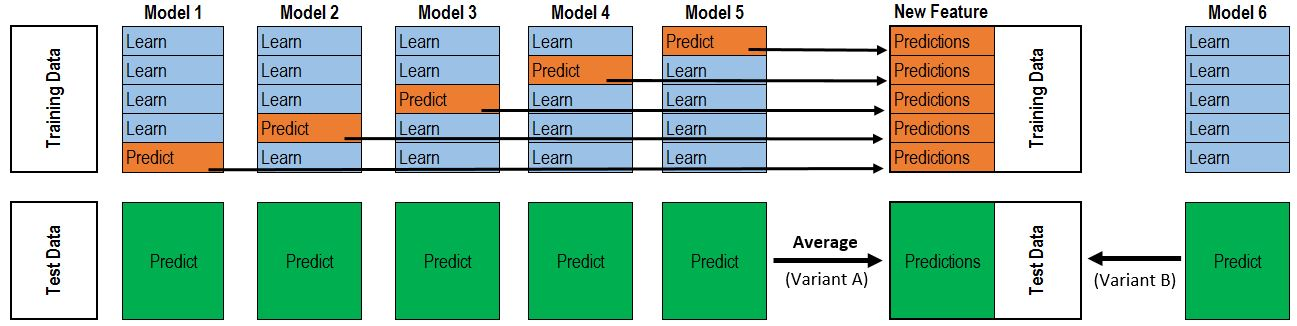

In [77]:
#from mlxtend.regressor import StackingRegressor

#metal_reg = Lasso(alpha = 0.0,random_state = 42)
#metal_reg = SVR(kernel='rbf', C = 20)

#stregr = StackingRegressor(regressors = [best_reg_lasso,best_elasticNet_reg],meta_regressor = metal_reg)

# params = {'meta-lasso__alpha':[0.1, 1.0, 10.0] }

# grid = GridSearchCV(estimator=stregr,
#                     param_grid=params,
#                     cv=5,
#                     refit=True)

# grid.fit(X_train, y_train)
# for params, mean_score, scores in grid.grid_scores_:
#     print("%0.3f +/- %0.2f %r"
#         % (mean_score, scores.std() / 2.0, params))


# rmsle_cv(stregr, X_train, y_train).mean()

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [79]:
#averaged_models = AveragingModels(models = (best_reg_lasso,best_elasticNet_reg))

In [85]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=256)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [86]:
#stacked_averaged_models = StackingAveragedModels(base_models = (grid_reg_xgb,model_lgb,best_elasticNet_reg),
#                                                 meta_model = best_reg_rf)
stacked_averaged_models = StackingAveragedModels(base_models = (grid_reg_xgb,model_lgb,best_elasticNet_reg),
                                                 meta_model = best_reg_rf)


In [113]:
stacked_averaged_models.fit(X_train_new.values,y_train)
stacked_pred = stacked_averaged_models.predict(X_train_new.values)
rmsle(y_train,stacked_pred)
#stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

0.3254108540373584

In [88]:
print("Stacked model MSE score {:.4f}".format(mean_squared_error(y_train,stacked_pred)))
print("Stacked model RMSE score {:.4f}".format(rmsle(y_train,stacked_pred)))

Stacked model MSE score 0.1059
Stacked model RMSE score 0.3254


In [119]:
stacked_test_pred = stacked_averaged_models.predict(features_test_new.values)

In [120]:
stacked_test_pred

array([4.79235211, 3.09822353, 4.63168062, ..., 0.01260763, 0.01260763,
       0.01260763])

In [128]:
train_stacked_new_feature = pd.read_csv('data/train_delay_feature.csv')
test_stacked_new_feature = pd.read_csv('data/test_delay_feature.csv')

In [129]:
train_stacked_new_feature['stacked_pre'] = stacked_pred

In [130]:
train_stacked_new_feature.head(5)

,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour,stacked_pre
0,0.313145,0.000000,-0.564782,-1.264542,-0.564468,0.167068,-2.076348,0.796791,-0.455960,-1.060827,0.0,0.663913,0.213757,0.892841,-0.367975,-0.367226,0.012608
1,0.399232,3.891820,-0.493471,-0.074909,-0.495511,0.167068,-2.076348,0.796791,-0.338300,0.797204,0.0,0.304540,0.213757,0.892841,-0.367975,-0.367226,4.164875
2,0.313139,0.000000,-0.564782,-1.264542,-0.564468,0.167068,-2.076348,0.796791,-0.476748,-0.890114,0.0,0.661677,0.213757,0.892841,-0.367975,-0.367226,1.773566
3,0.390510,5.375278,-0.757340,0.521000,-0.753016,0.167068,-1.418568,0.796791,-0.442300,-0.389247,0.0,0.265366,0.213757,0.892841,-0.537685,-0.536631,5.233697
4,0.390510,5.755742,-0.753022,0.740068,-0.748292,0.167068,-1.418568,0.796791,-0.428795,-0.389247,0.0,0.265366,0.213757,0.892841,-0.537685,-0.536631,5.575006


In [131]:
test_stacked_new_feature['stacked_pre'] = stacked_test_pred

In [132]:
test_stacked_new_feature.head(5)

,stop_id,arrival_delay,arrival_time,departure_delay,departure_time,schedule_relationship,trip_id,route_id,timestamp,stop_name,stop_lat,stop_lon,line_id,line_name,arrival_time_hour,departure_time_hour,stacked_pre
0,0.44566,188,-0.859597,0.528896,-0.876396,0.167068,-0.437141,-1.699189,0.373655,0.547118,0.0,0.107369,1.633262,-1.800567,-0.212126,-0.211656,4.792352
1,0.44566,34,-0.861330,-0.207316,-0.877705,0.167068,-0.539183,-1.699189,0.373655,0.547118,0.0,0.107369,1.633262,-1.800567,-0.367975,-0.367226,3.098224
2,0.44566,154,-0.860339,0.432349,-0.877181,0.167068,-0.437141,-1.699189,0.377206,0.547118,0.0,0.107369,1.633262,-1.800567,-0.212126,-0.211656,4.631681
3,0.44566,0,-0.861578,-1.264542,-0.877967,0.167068,-0.539183,-1.699189,0.377206,0.547118,0.0,0.107369,1.633262,-1.800567,-0.367975,-0.367226,0.012608
4,0.44566,180,-0.859844,0.507596,-0.876657,0.167068,-0.437141,-1.699189,0.380747,0.547118,0.0,0.107369,1.633262,-1.800567,-0.212126,-0.211656,4.718160


In [133]:
train_stacked_new_feature.to_csv('data/train_stacked_new_feature.csv')
test_stacked_new_feature.to_csv('data/test_stacked_new_feature.csv')

Using LSTM to do regression prediction
Train on 20800 samples, validate on 5200 samples
Epoch 1/100
 - 3s - loss: 6.7763 - val_loss: 2.8183
Epoch 2/100
 - 1s - loss: 0.6462 - val_loss: 0.1574
Epoch 3/100
 - 1s - loss: 0.1420 - val_loss: 0.1432
Epoch 4/100
 - 1s - loss: 0.1327 - val_loss: 0.1365
Epoch 5/100
 - 1s - loss: 0.1266 - val_loss: 0.1308
Epoch 6/100
 - 1s - loss: 0.1220 - val_loss: 0.1262
Epoch 7/100
 - 1s - loss: 0.1183 - val_loss: 0.1225
Epoch 8/100
 - 2s - loss: 0.1155 - val_loss: 0.1198
Epoch 9/100
 - 1s - loss: 0.1136 - val_loss: 0.1180
Epoch 10/100
 - 2s - loss: 0.1123 - val_loss: 0.1168
Epoch 11/100
 - 2s - loss: 0.1114 - val_loss: 0.1159
Epoch 12/100
 - 1s - loss: 0.1107 - val_loss: 0.1151
Epoch 13/100
 - 2s - loss: 0.1103 - val_loss: 0.1146
Epoch 14/100
 - 2s - loss: 0.1098 - val_loss: 0.1141
Epoch 15/100
 - 1s - loss: 0.1095 - val_loss: 0.1136
Epoch 16/100
 - 1s - loss: 0.1092 - val_loss: 0.1133
Epoch 17/100
 - 2s - loss: 0.1088 - val_loss: 0.1130
Epoch 18/100
 - 1s -

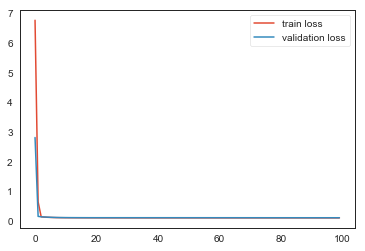

In [4]:
#y_train.fillna(y_train.mean,inplace=True)
from keras.models import Sequential, load_model
from keras.layers import Dense,LSTM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#scaling function
def scale(train_features,test_features):
    scaler = MinMaxScaler()
    data = pd.concat([train_features,test_features])
    scaled_data = pd.DataFrame(scaler.fit_transform(data),columns=test_features.keys())
    train_features = scaled_data.iloc[0:train_features.shape[0]]
    test_features = scaled_data.iloc[train_features.shape[0]:]
    return train_features,test_features

print("Using LSTM to do regression prediction")
    
#load precessed data
train_data = pd.read_csv('data/train_stacked_new_feature.csv')
train_features = train_data.drop('arrival_delay',axis=1)
#y = np.expm1(train_data['arrival_delay'])
y = train_data['arrival_delay']
X_test = pd.read_csv('data/test_stacked_new_feature.csv')
    
#select best features for LSTM
selected_features = ['stop_id','arrival_time','departure_delay','departure_time','schedule_relationship',
                     'trip_id','route_id','timestamp','stop_name','stop_lat','stop_lon','line_id','line_name',
                     'arrival_time_hour','departure_time_hour','stacked_pre']
#adapt the data form to LSTM
X_test = X_test[selected_features]
X_train = train_features[selected_features]
    
X_train,X_test = scale(X_train,X_test) #Scaling
    
X_train = X_train.values.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0],1,X_test.shape[1])
    
#split the data
X_train,X_val,y_train,y_val = train_test_split(X_train,y,test_size=0.2,random_state=333)
    
#construct LSTM based on keras
model = Sequential()
model.add(LSTM(100,activation='tanh',input_shape=(X_train.shape[1],X_train.shape[2])))
#model.add(LSTM(300,return_sequences=True))
#model.add(LSTM(300,return_sequences=True))
#model.add(LSTM(300))
model.add(Dense(1,activation='relu'))
model.compile(loss='mse',optimizer='adam')
history = model.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_val,y_val),verbose=2,shuffle=False)
#model = load_model('lstm_model.h5')#load the history best model to recovery the best result
print(history)  
#prediction
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
    
rmse = mean_squared_error(y_val,y_val_pred)**0.5
score = 1.0 / (1.0 + rmse)
mse = mean_squared_error(y_val,y_val_pred)
    
y_test_pred = np.array(y_test_pred).flatten()
ID_test = pd.read_csv('data/dataset_new_2.csv')['stop_id']
#ID_train = pd.read_csv('data/dataset_new_1.csv')
y_test_pred = np.expm1(y_test_pred)
y_train_pred = np.expm1(y_val_pred)
predict_df_lstm = pd.DataFrame({'stop_id':ID_test,'Delay':y_test_pred})

#DataFrame set Index
predict_df_lstm = predict_df_lstm.set_index('stop_id')
predict_df_lstm.to_csv('data/test_result_lstm.csv')


print('score: ',score)
print('rmse: ',rmse)
print('mse: ',mse)
    
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#### Predic Arrival delay

In [ ]:
pred = np.expm1(stacked_averaged_models.predict(features_test_new.values) * 0.5) + (y_test_pred*0.5)
pred

### Output

In [209]:
#Increase index, column name, build DataFrame, conform to output data format

test_df = pd.read_csv('data/dataset_new_2.csv')
#test_df = test_df.loc[test_df['stop_id'] == 2000340]
predict_df = pd.DataFrame({'stop_id':test_df['stop_id'],'stop_name':test_df['stop_name'],'Delay':pred})

#DataFrame set Index
predict_df = predict_df.set_index('stop_id')

#Rename the column of the DataFrame, column name = dictionary {original: after replacement}
#predict_df.rename(columns = {predict_df.columns[0]:'Id'},inplace=True)
predict_df

,stop_name,Delay
stop_id,,
2211142,"Padstow Station, Platform 2",136.251045
2211142,"Padstow Station, Platform 2",25.489581
2211142,"Padstow Station, Platform 2",115.042152
2211142,"Padstow Station, Platform 2",-0.230914
2211142,"Padstow Station, Platform 2",132.795076
2211142,"Padstow Station, Platform 2",123.069447
2211142,"Padstow Station, Platform 2",-0.229206
2211142,"Padstow Station, Platform 2",4.451044
2211142,"Padstow Station, Platform 2",-0.175537


In [351]:
predict_df.to_csv('data/train_delay.csv',index=True)